In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/부트캠프_프로젝트/타이타닉/titanic.csv')

# 3.상관관계 분석

### 1 pclass , sex 컬럼

객실 등급이 높아짐에 따라 생존률이 상승하는 추세입니다.  

In [3]:
#'pclass'객실 등급에 따른 생존률2
pd.pivot_table(data=df, index=['pclass','sex'], values='survived', aggfunc=['sum','mean','count'])

sum      mean    count
              survived  survived survived
pclass sex                               
1      female      139  0.965278      144
       male         61  0.340782      179
2      female       94  0.886792      106
       male         25  0.146199      171
3      female      106  0.490741      216
       male         75  0.152130      493

여성이 객실등급이 1,2 일때 높은 생존률을 보여주지만, 남성의 경우 객실등급이 1등급인 경우를 제외하고 낮은 생존률을 보입니다.

성별이 여성일 경우에 생존률이 크게 상승했습니다.  <br><br>
전체 평균 생존률 38.2%<br>
여성 : 약 72.7% 생존 <br>
남성 : 약 19% 생존

In [4]:
#'sex'성별에 따른 생존률
pd.pivot_table(data=df, index=['sex'], values='survived', aggfunc=['sum','mean','count'])

,sum,mean,count
,survived,survived,survived
sex,,,
female,339,0.727468,466
male,161,0.190985,843


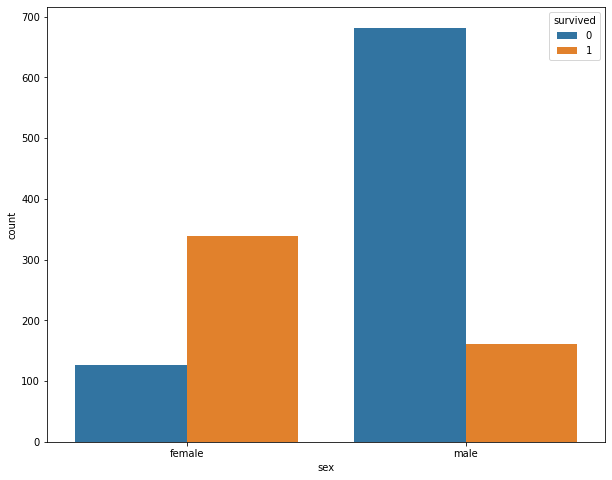

In [5]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='sex', hue='survived')

In [6]:
#'sex'성별에 따른 생존률2
pd.pivot_table(data=df, index=['sex','pclass'], values='survived', aggfunc=['sum','mean','count'])

sum      mean    count
              survived  survived survived
sex    pclass                            
female 1           139  0.965278      144
       2            94  0.886792      106
       3           106  0.490741      216
male   1            61  0.340782      179
       2            25  0.146199      171
       3            75  0.152130      493

In [7]:
#'parch'부모, 혹은 자녀의 수에 따른 생존률
pd.pivot_table(data=df, index=['parch'], values='survived', aggfunc=['sum','mean','count'])

,sum,mean,count
,survived,survived,survived
parch,,,
0,336,0.335329,1002
1,100,0.588235,170
2,57,0.504425,113
3,5,0.625000,8
4,1,0.166667,6
5,1,0.166667,6
6,0,0.000000,2
9,0,0.000000,2


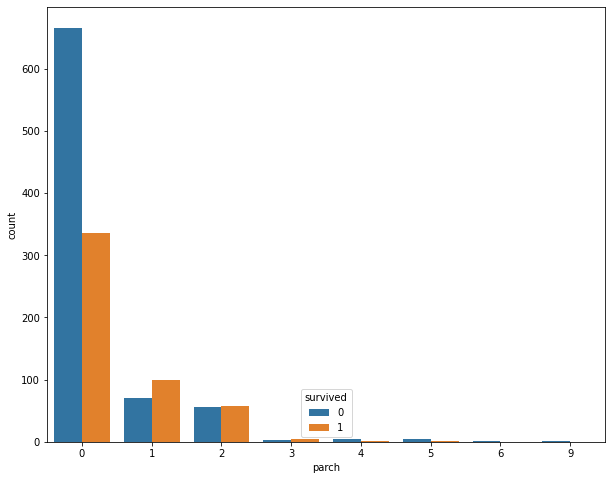

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='parch', hue='survived')
plt.show()

높은 상관 관계를 띄는 객실과 성별(여성)이 자녀가 있는 경우 생존률이 어떻게 달라질까? 
<br>

추측 : 위에서 진행한 pclass, sex는 유의미한 상관관계가 있었다. 만약 부모 및 자녀가 생존률에 영향을 미친다면 pclass, sex 와 같이 통계를 진행했을 때 더 높은 생존률을 나타낼 것이다. 

<br>


In [9]:
#'parch'부모, 혹은 자녀의 수에 따른 생존률2
pd.pivot_table(data=df, index=['pclass','parch','sex'], values='survived', aggfunc=['sum','mean','count'])

sum      mean    count
                    survived  survived survived
pclass parch sex                               
1      0     female       94  0.969072       97
             male         47  0.324138      145
       1     female       29  1.000000       29
             male          7  0.333333       21
       2     female       14  0.875000       16
             male          7  0.636364       11
       3     female        1  1.000000        1
             male          0  0.000000        1
       4     female        1  1.000000        1
             male          0  0.000000        1
2      0     female       51  0.836066       61
             male         13  0.089655      145
       1     female       22  0.916667       24
             male          9  0.473684       19
       2     female       18  1.000000       18
             male          3  0.428571        7
       3     female        3  1.000000        3
3      0     female       73  0.540741      135
             male         58  0.138425      419
       1     female       19  0.542857       35
             male         14  0.333333       42
       2     female       12  0.342857       35
             male          3  0.115385       26
       3     female        1  0.500000        2
             male          0  0.000000        1
       4     female        0  0.000000        3
             male          0  0.000000        1
       5     female        1  0.250000        4
             male          0  0.000000        2
       6     female        0  0.000000        1
             male          0  0.000000        1
       9     female        0  0.000000        1
             male          0  0.000000        1


결과 : 전반적으로 부모 및 자녀 수가 1~2명일 때 가장 높은 생존률을 띄지만 부모 및 자녀 수가 0명일 때와 크게 다르지 않다는 점을 미뤄보아 부모 및 자녀 수는 생존률에 영향을 미치지 않는 것으로 판단된다.

### 2 embarked sex pclass 컬럼 비교


In [ ]:
#'embarked'선착장정보에 따른 생존률
pd.pivot_table(data=df3, index=['embarked'], values='survived', aggfunc=['sum','mean','count'])

,sum,mean,count
,survived,survived,survived
embarked,,,
C,150,0.555556,270
Q,44,0.357724,123
S,304,0.332604,914


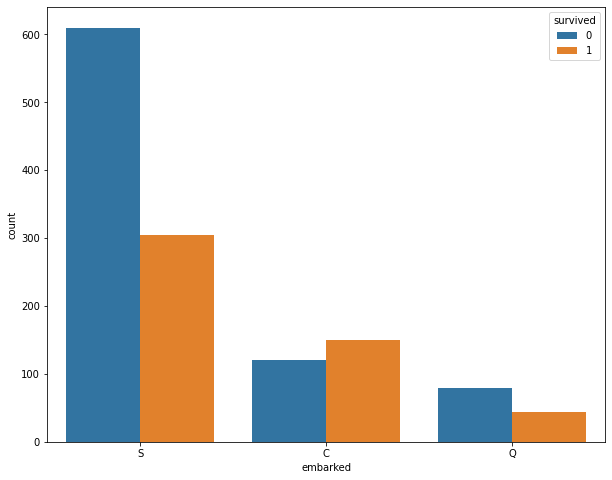

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df3, x='embarked', hue='survived')
plt.show()

In [ ]:
#'embarked'선착장정보에 따른 생존률2
pd.pivot_table(data=df3, index=['sex','pclass','embarked'], values='survived', aggfunc=['sum','mean','count'])

sum      mean    count
                       survived  survived survived
sex    pclass embarked                            
female 1      C              69  0.971831       71
              Q               2  1.000000        2
              S              66  0.956522       69
       2      C              11  1.000000       11
              Q               2  1.000000        2
              S              81  0.870968       93
       3      C              22  0.709677       31
              Q              33  0.589286       56
              S              51  0.395349      129
male   1      C              28  0.400000       70
              Q               0  0.000000        1
              S              33  0.305556      108
       2      C               5  0.294118       17
              Q               0  0.000000        5
              S              20  0.134228      149
       3      C              15  0.214286       70
              Q               7  0.122807       57
              S              53  0.144809      366

In [ ]:
pd.pivot_table(data=df3, index=['fare'], values='survived', aggfunc=['sum','mean','count'])

,sum,mean,count
,survived,survived,survived
fare,,,
0.0000,2,0.117647,17
3.1708,1,1.000000,1
4.0125,0,0.000000,1
5.0000,0,0.000000,1
6.2375,0,0.000000,1
...,...,...,...
227.5250,3,0.600000,5
247.5208,2,0.666667,3


In [11]:
#'sex'성별에 따른 생존률2
pd.pivot_table(data=df, index=['embarked','pclass'], values='survived', aggfunc=['sum','mean','count'])

sum      mean    count
                survived  survived survived
embarked pclass                            
C        1            97  0.687943      141
         2            16  0.571429       28
         3            37  0.366337      101
Q        1             2  0.666667        3
         2             2  0.285714        7
         3            40  0.353982      113
S        1            99  0.559322      177
         2           101  0.417355      242
         3           104  0.210101      495

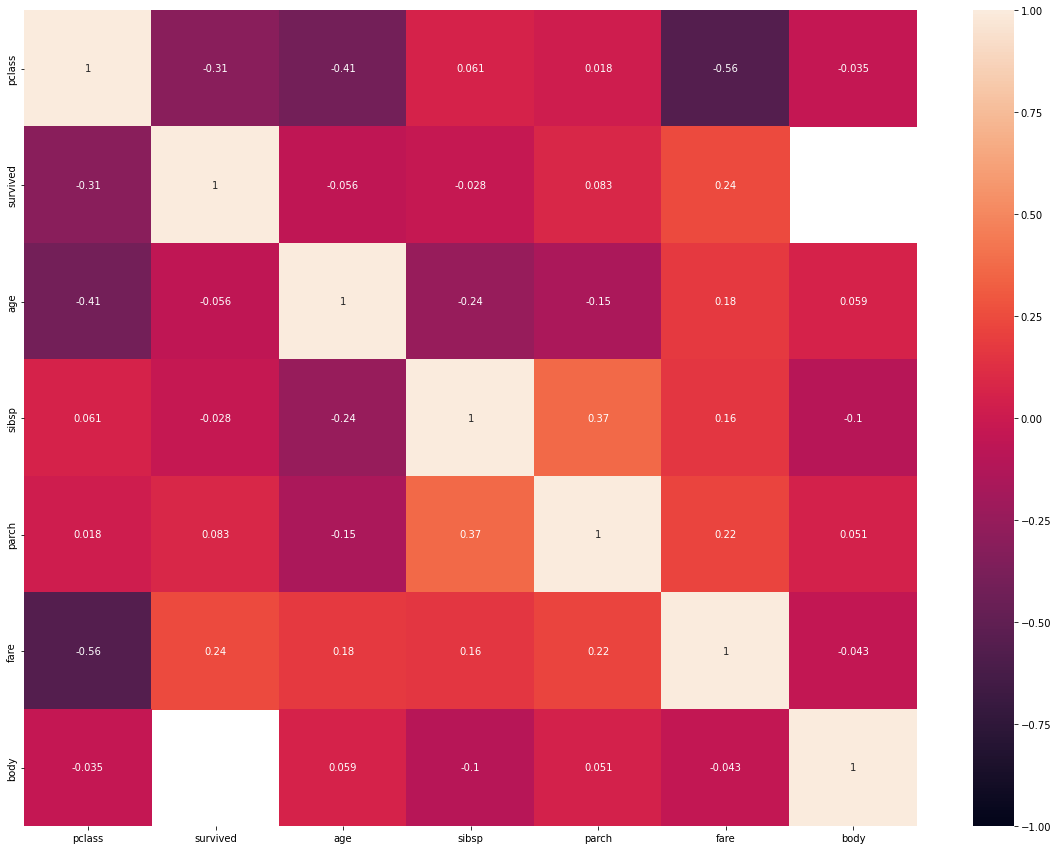

In [10]:
plt.rcParams["figure.figsize"] = (20,15)
sns.heatmap(df.corr(),annot = True,vmin = -1, vmax=1)

# 4.정리
##무엇이 생존에 영향을 미쳤을까?


###생존률과 유의미한 상관관계를 갖는 컬럼은 sex, pclass, embarked 세 가지로 구분된다. 
###자식이나, 가족 수에 따른 생존률 변화는 데이터가 충분하지 않아 검증하기 어려울 것으로 보인다.
<br><br>
###1.   sex컬럼 - 동일한 조건에서 남성에 비해 여성이 앞도적으로 높은 생존룰을 보여준다
<br>

###2.   pclass컬럼 - 객실등급이 높으면 생존률이 상대적으로 높은것을 확인할 수 있다. 다만 여성의 경우 객실등급이 1,2 일때 높은 생존률을 보여주지만, 남성의 경우 객실등급이 1등급인 경우를 제외하고 낮은 생존률을 보입니다.
<br>

###3.   emberked컬럼
####선착장 위치에 따라 생존률 변화가 관찰됩니다. C > Q > S 
####C선착장이 구명보트에 접근하기 쉬운 위치 or 탈출에 유리한 장소였을 것이라고 예상됩니다.

